In [2]:
import numpy as np
from scipy import signal
import pydicom as dicom
from matplotlib import image
import matplotlib.pyplot as plt
import os
import cv2

## Import Images 

In [3]:
from pydicom import dcmread

In [4]:
#Import 2 images
fpath1 = '/Users/sevdeetoz/Jupyter/HCM/Optical Flow/IM-0133-0001.dcm'
fpath2 = '/Users/sevdeetoz/Jupyter/HCM/Optical Flow/IM-0133-0010.dcm'
I1 = dcmread(fpath1)
I2 = dcmread(fpath2)

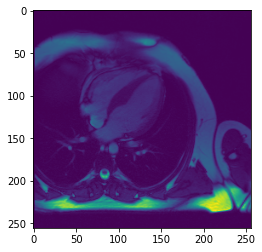

In [5]:
# Load dimensions based on the number of rows, columns.
#ConstPixelDims = (int(I1.Rows), int(I1.Columns), len(lstFilesDCM))
ConstPixelDims = (int(I1.Rows), int(I1.Columns))
I1g = np.zeros(ConstPixelDims, dtype=I1.pixel_array.dtype)
I1g[:, :] = I1.pixel_array

I2g = np.zeros(ConstPixelDims, dtype=I2.pixel_array.dtype)
I2g[:, :] = I2.pixel_array
plt.imshow(I1g)

In [6]:
I1g.shape, type(I1g)

((256, 256), numpy.ndarray)

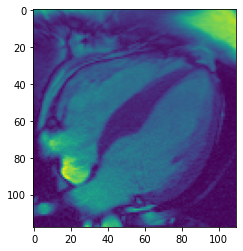

In [7]:
## Cut edges of the image
I1c = I1g[44:162,52:162]
I2c = I2g[44:162,52:162]
plt.imshow(I1c)

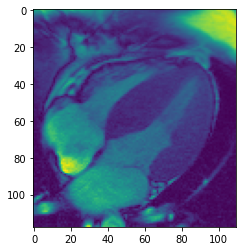

In [8]:
plt.imshow(I2c)

## Calculate Flow
### source1: https://github.com/IRailean/Dense-Optical-Flow/blob/master/OpticalFlow.py

### source2: https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_video/py_lucas_kanade/py_lucas_kanade.html


In [9]:
flow = cv2.calcOpticalFlowFarneback(I1c, I2c,None, pyr_scale = 0.3, levels = 50, winsize = 11, iterations = 15, poly_n = 5, poly_sigma = 1.1, flags = 0)

flow.shape

(118, 110, 2)

In [10]:
# Compute the magnitude and angle of the 2D vectors
mag, ang = cv2.cartToPolar(flow[:,:, 0], flow[:,:, 1])

In [24]:
hsv = np.zeros((I1c.shape[0], I1c.shape[1], 3), dtype=np.uint8)
hsv[:, :, 0] = 255
hsv[:, :, 1] = 255

hsv[..., 0] = ang*180/np.pi/2
hsv[..., 2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)

processed_image = cv2.cvtColor(hsv, cv2.COLOR_BGR2GRAY)

#cv2.imshow("colored flow", processed_image)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

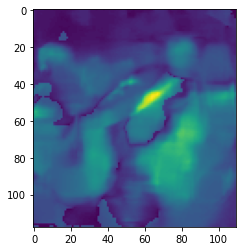

In [25]:
plt.imshow(processed_image)

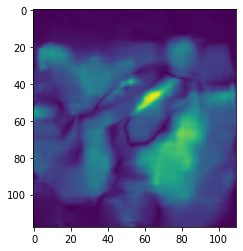

In [13]:
plt.imshow(mag)

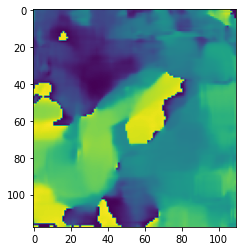

In [14]:
plt.imshow(ang)

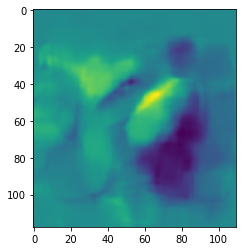

In [15]:
#flow in x direction
plt.imshow(flow[...,0])

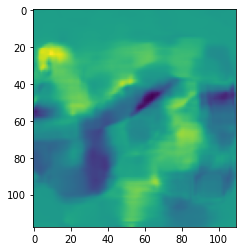

In [16]:
#flow in y direction
plt.imshow(flow[...,1])

In [18]:
# vector fields
x,y = np.meshgrid(np.linspace(0,I1c.shape[0],I1c.shape[0]),np.linspace(0,I1c.shape[1],I1c.shape[1]))

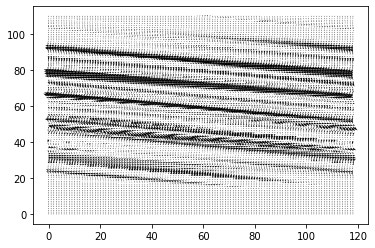

In [22]:
plt.quiver(x,y,flow[...,0],flow[...,1])